Implementation of this notebook:
https://www.kaggle.com/residentmario/grammer-of-graphics-with-plotnine-optional/notebook

In [5]:
import os
import pandas as pd

In [2]:
os.getcwd()
os.chdir('/Users/brentan/Downloads')

In [3]:
os.listdir()

['winemag-data-130k-v2.csv.zip',
 '.DS_Store',
 '.localized',
 'BNixon_CoverLetter.pdf',
 'BNixon_CV.pdf']

In [8]:
reviews = pd.read_csv('winemag-data-130k-v2.csv.zip', index_col=0)

In [10]:
reviews.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [19]:
from plotnine import *

In [15]:
top_wines = reviews[reviews['variety'].isin(
    reviews['variety'].value_counts().head(5).index)]

In [16]:
df = top_wines.head(1000).dropna()

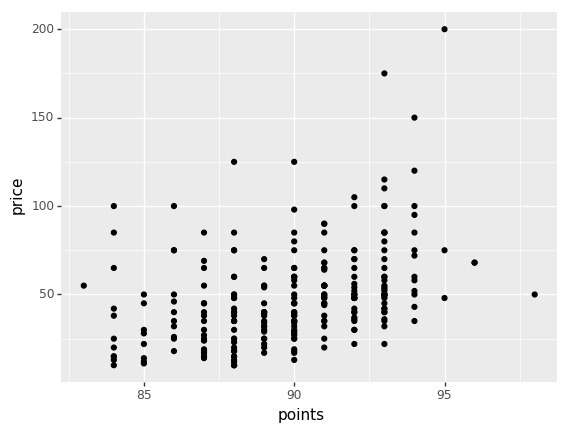

<ggplot: (-9223372036565122153)>

In [20]:
(ggplot(df)
 + aes('points', 'price') 
 + geom_point()
)

/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


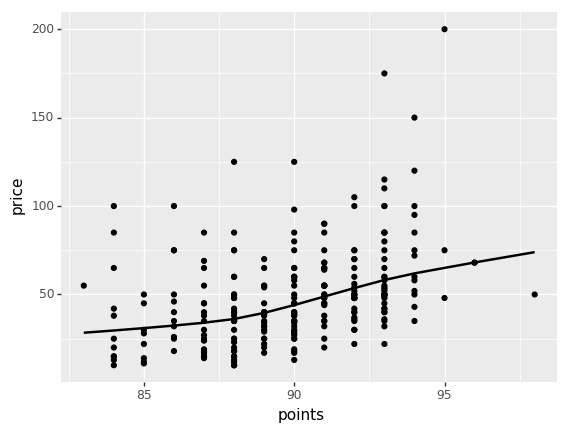

<ggplot: (289819561)>

In [23]:
(ggplot(data=df)
+ aes('points', 'price')
+ geom_point() 
+ stat_smooth()
)

/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 186 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


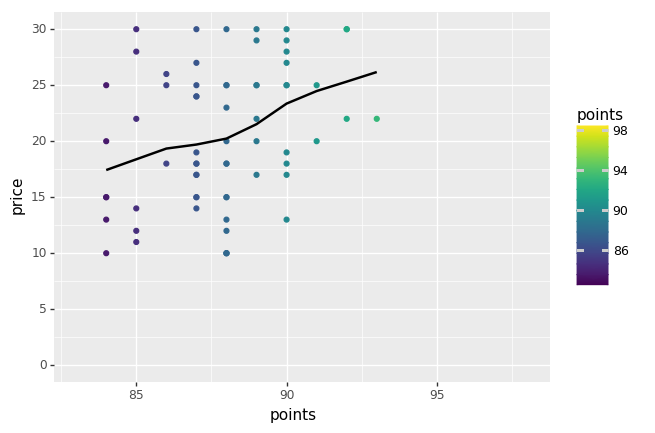

<ggplot: (291009242)>

In [29]:
(
ggplot(data=df)
+ geom_point()
+ aes(color='points')
+ aes('points', 'price') 
+ stat_smooth()
+ scale_y_continuous(breaks=range(0,210,5), limits=(0,30))
)

/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


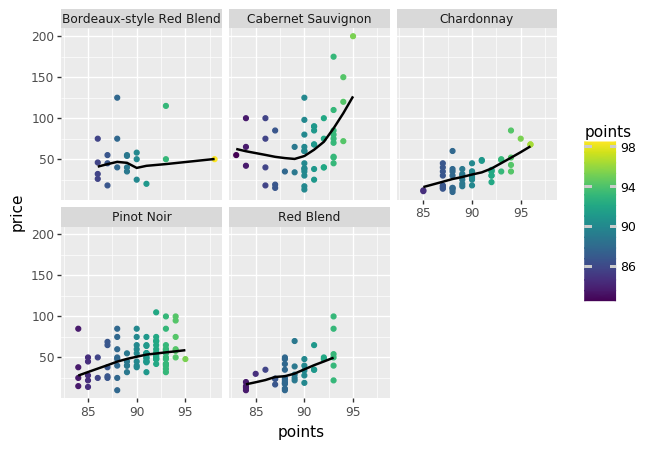

<ggplot: (290035853)>

In [31]:
(
ggplot(data=df)
+ geom_point()
+ aes(color='points')
+ aes('points', 'price') 
+ stat_smooth()
+ facet_wrap('~variety')
)

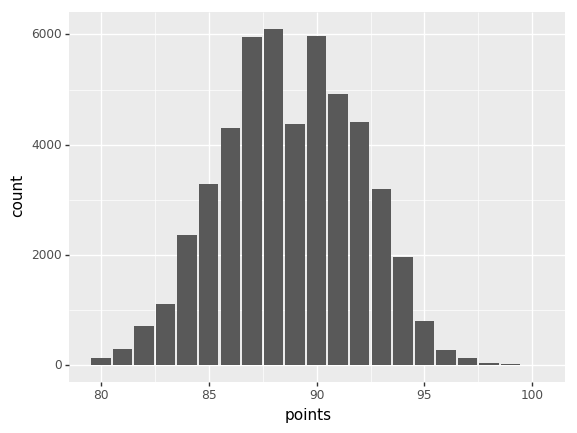

<ggplot: (290443759)>

In [32]:
(ggplot(top_wines)
    + aes('points')
    + geom_bar()
)

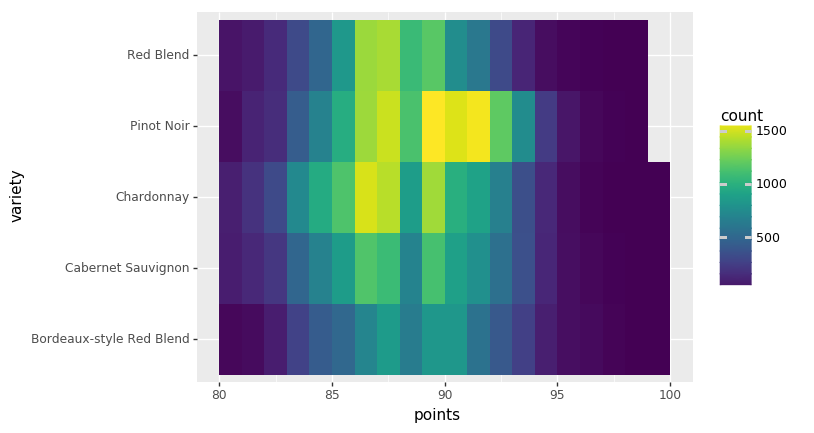

<ggplot: (-9223372036572457770)>

In [36]:
(
ggplot(data=top_wines)
    + aes('points', 'variety')
    + geom_bin2d(bins=20)
)